In [3]:
import numpy as np

import matplotlib.pyplot as plt

import tqdm

In [4]:
import os

os.chdir("..")

In [5]:
from importlib.machinery import SourceFileLoader

main = SourceFileLoader("main", "src/main.py").load_module()

eq = SourceFileLoader("eq", "src/numerical_equilibria_n_bit_vs_n_bit.py").load_module()

from main import invariant_distribution, invariant_distribution_analytically

def match_payoff(player, coplayer, Sx):
    M = eq.calculate_M_memory_two(player, coplayer)
    ss = invariant_distribution(M)

    return ss @ Sx

In [6]:
import sympy as sym

sym.init_printing(True)

# One bit case

In [7]:
q1, q2 = sym.symbols("q1:3")

p1, p2 = sym.symbols("p1:3")

In [8]:
player = [p1, p2, p1, p2]

In [9]:
coplayer = [q1, q1, q2, q2]

In [10]:
M = main.calculate_M(player, coplayer, analytical=True)

In [11]:
ss = invariant_distribution_analytically(M)

In [12]:
ss = [s.factor() for s in ss]

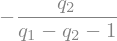

In [13]:
(ss[0] + ss[2]).factor()

In [14]:
ss[0].subs({q1: 1, q2:0})

In [15]:
ss[2].subs({q1: 1, q2:0})

In [16]:
w_ucc = q2 * (p1 * q1 - p2 * q1 + p2) / (1 - q1 + q2)

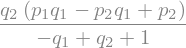

In [17]:
w_ucc

In [18]:
w_udc = - w_ucc + q2 / (1 - q1 + q2)

In [19]:
(ss[2] - w_udc).factor()

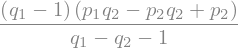

In [20]:
ss[1]

In [21]:
w_ucd = ((1 - q1) * (p1 * q2 - p2 * q2 + p2)) / (1 - q1 + q2)

In [22]:
(w_ucd - ss[1]).factor()

In [21]:
w_udd = - w_ucd + (1 - q1) / (1 - q1 + q2)

In [22]:
(w_udd - ss[3]).factor()

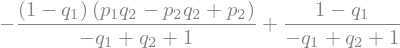

In [23]:
w_udd

In [24]:
x = w_ucc + w_udc

In [25]:
y = (w_ucd + w_udd)

In [26]:
b, c = sym.symbols("b, c")

In [27]:
expr = b * (x * p1 + y * p2) - c * x

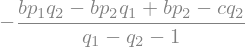

In [28]:
expr.factor()

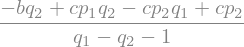

In [29]:
(ss @ np.array([b - c, -c, b , 0])).factor()

### Two bits case

In [23]:
p3, p4, q3, q4 = sym.symbols("p3, p4, q3, q4")

In [24]:
player = [p1, p2, p1, p2, p3, p4, p3, p4] * 2

In [25]:
coplayer = [q1, q1, q2, q2, q3, q3, q4, q4] * 2

In [26]:
M = eq.calculate_M_memory_two(player, coplayer, analytical=True)

In [27]:
# ss = invariant_distribution_analytically(M)

In [28]:
def transformed_two_bit_markov(player, analytical=True):
    
    if analytical == True:
        M = sym.Matrix([[player[0], (1 - player[0]), 0, 0],
                        [0, 0, player[1], (1 - player[1])],
                        [player[2], (1 - player[2]), 0, 0],
                        [0, 0, player[3], (1 - player[3])]])
    else:
        M = np.array([[player[0], (1 - player[0]), 0, 0],
                        [0, 0, player[1], (1 - player[1])],
                        [player[2], (1 - player[2]), 0, 0],
                        [0, 0, player[3], (1 - player[3])]])
    
    
    return M

In [29]:
for i in range(1):
    
    np.random.seed(i)

    p1val, p2val, p3val, p4val = np.random.random(4).round(3)
    
    q1val, q2val, q3val, q4val, = np.random.random(4).round(3)
    
    player = [p1val, p2val, p1val, p2val, p3val, p4val, p3val, p4val] * 2

    coplayer = [q1val, q1val, q2val, q2val, q3val, q3val, q4val, q4val] * 2
    
    M2 = eq.calculate_M_memory_two(player, coplayer)
    
    ss2 = main.invariant_distribution(M2)

In [30]:
alternator = [1, 1, 0, 0]

In [31]:
ss2 @ np.array([1 - .5, -.5, 1, 0] * 4)

In [38]:
ss2 @ np.array([1 - .5, 1, -.5, 0] * 4)

In [39]:
M = transformed_two_bit_markov([q1val, q2val, q3val, q4val], analytical=False)

In [40]:
ss = invariant_distribution(M)

In [43]:
ss @ np.array([1 - .5, 1, -.5, 0])

array([0.24084567, 0.31672856, 0.31672856, 0.12569721])

In [35]:
rq = ss[0] + ss[1]

rq

In [36]:
cc = [0, 2, 8, 10]

cd = [1, 3, 9, 11]

dc = [4, 6, 12, 14]

In [37]:
sum([ss2[i] for i in cc]) + sum([ss2[i] for i in cd])

In [86]:
sum([ss2[i] for i in cd]), sum([ss2[i] for i in dc])

In [90]:
(ss[0] + ss[1]) * (-.5)

In [91]:
ss[0] * p1val + ss[1] * p2val + ss[2] * p3val + ss[3] * p4val

In [97]:
(.5) * sum(ss * np.array([p1val, p2val, p3val, p4val])) - (ss[0] + ss[1]) * (-.5)

In [98]:
sum(ss * np.array([p1val, p2val, p3val, p4val]))

In [99]:
sum(ss * np.array([p1val, p2val, p3val, p4val])) * .5

**One bit case**

In [47]:
b, c = sym.symbols("b, c")

In [78]:
player_one = (sym.Rational(1, 2), sym.Rational(1, 3), sym.Rational(1, 2), sym.Rational(1, 3))

player_two = (sym.Rational(1, 4), sym.Rational(1, 4), sym.Rational(1, 2), sym.Rational(1, 2))

In [79]:
M = main.calculate_M(player_one, player_two, analytical=True)

ss = invariant_distribution_analytically(M)

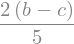

In [80]:
sum(ss @ np.array([b - c, -c, b, 0])).factor()

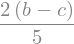

In [88]:
sum(ss @ np.array([b - c, b, -c, 0])).factor()

In [89]:
# M2 = sym.Matrix([[sym.Rational(1, 4), 1 - sym.Rational(1, 4)], [sym.Rational(1, 2), 1 - sym.Rational(1, 2)]])

# M2b

In [90]:
ss2 = invariant_distribution_analytically(M2)

In [91]:
rho_1 = ss2[0] * player_one[0] +  ss2[1] * player_one[1]

In [94]:
rho_1

In [95]:
rho_2 = ss2[0]

In [96]:
rho_2

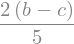

In [93]:
(b * rho_1 - c * rho_2).factor()

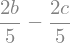

In [87]:
b * rho_2 - c * rho_1

In [145]:
payoff2 = (b * (ss2 @ sym.Matrix([q1, q2]))[0] - c * ss2[0]).factor()

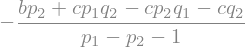

In [146]:
payoff

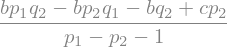

In [147]:
payoff2

In [148]:
payoff.subs({b:1, c:0.5, p1:1, p2:1, q1:0, q2:1})

In [149]:
payoff2.subs({b:1, c:0.5, p1:1, p2:1, q1:0, q2:1})